In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(
    context='paper', 
    palette='colorblind',
    style='whitegrid',
    rc={'text.usetex':True, 'mathtext.fontset':'cm'},
)

In [3]:
%matplotlib inline

# Spike Trains

In [4]:
from rsnn.signals.spike_train import SpikeTrain

In [5]:
duration = 100
soft_refractory_period = 5
hard_refractory_period = 5
firing_rate = 0.1
num_channels = 5

In [6]:
spike_train = SpikeTrain(num_channels, duration, firing_rate, hard_refractory_period, soft_refractory_period)

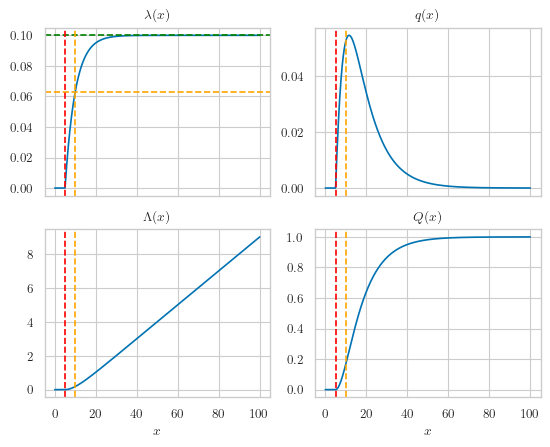

In [7]:
x = np.linspace(0, spike_train.duration, 1000)

fig, axes = plt.subplots(2, 2, sharex="all")

axes[0,0].plot(x, spike_train.hazard(x))
axes[0,0].set_title("$\lambda(x)$")
axes[0,0].axhline(spike_train.firing_rate, linestyle="--", color="green")
axes[0,0].axhline(spike_train.firing_rate * (1-np.exp(-1)), linestyle="--", color="orange")
axes[0,0].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[0,0].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")

axes[1,0].plot(x, spike_train.Hazard(x))
axes[1,0].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[1,0].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")
axes[1,0].set_title("$\Lambda(x)$")
axes[1,0].set_xlabel("$x$")

axes[0,1].plot(x, spike_train.q(x))
axes[0,1].set_title("$q(x)$")
axes[0,1].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[0,1].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")

axes[1,1].plot(x, spike_train.Q(x))
axes[1,1].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[1,1].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")
axes[1,1].set_title("$Q(x)$")
axes[1,1].set_xlabel("$x$")

plt.show()

In [8]:
spike_train.random()

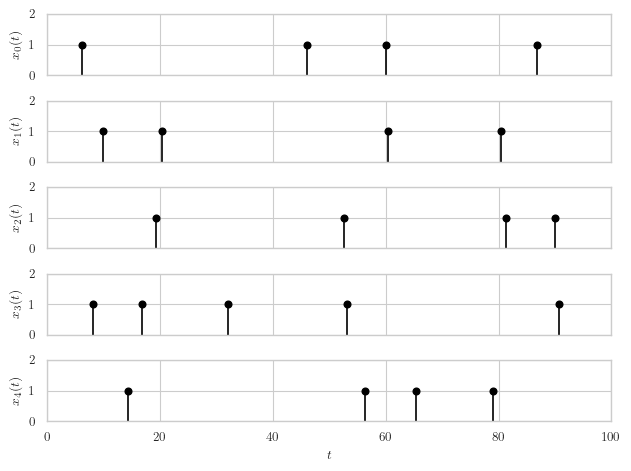

In [11]:
fig, axes = plt.subplots(num_channels, 1, sharex="all")

for c in range(num_channels):
    axes[c].stem(spike_train.firing_times[c], np.ones_like(spike_train.firing_times[c]), basefmt=" ", linefmt='black')
    axes[c].set_ylabel(f"$x_{c}(t)$")
    axes[c].set_ylim(0, 2)

axes[-1].set_xlabel("$t$")
axes[-1].set_xlim(0, spike_train.duration)
    
fig.tight_layout()

# Periodic Spike Trains

In [14]:
from rsnn.signals.spike_train import PeriodicSpikeTrain

In [15]:
period = 100
soft_refractory_period = 5
hard_refractory_period = 5
firing_rate = 0.1
num_channels = 5

In [16]:
spike_train = PeriodicSpikeTrain(num_channels, period, firing_rate, hard_refractory_period, soft_refractory_period)

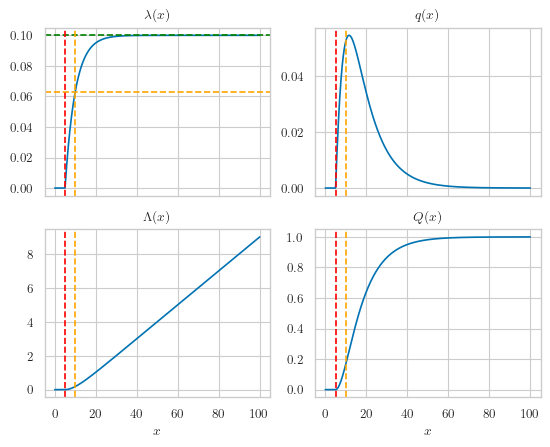

In [17]:
x = np.linspace(0, spike_train.duration, 1000)

fig, axes = plt.subplots(2, 2, sharex="all")

axes[0,0].plot(x, spike_train.hazard(x))
axes[0,0].set_title("$\lambda(x)$")
axes[0,0].axhline(spike_train.firing_rate, linestyle="--", color="green")
axes[0,0].axhline(spike_train.firing_rate * (1-np.exp(-1)), linestyle="--", color="orange")
axes[0,0].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[0,0].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")

axes[1,0].plot(x, spike_train.Hazard(x))
axes[1,0].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[1,0].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")
axes[1,0].set_title("$\Lambda(x)$")
axes[1,0].set_xlabel("$x$")

axes[0,1].plot(x, spike_train.q(x))
axes[0,1].set_title("$q(x)$")
axes[0,1].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[0,1].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")

axes[1,1].plot(x, spike_train.Q(x))
axes[1,1].axvline(spike_train.hard_refractory_period, linestyle="--", color="red")
axes[1,1].axvline(spike_train.hard_refractory_period + spike_train.soft_refractory_period, linestyle="--", color="orange")
axes[1,1].set_title("$Q(x)$")
axes[1,1].set_xlabel("$x$")

plt.show()

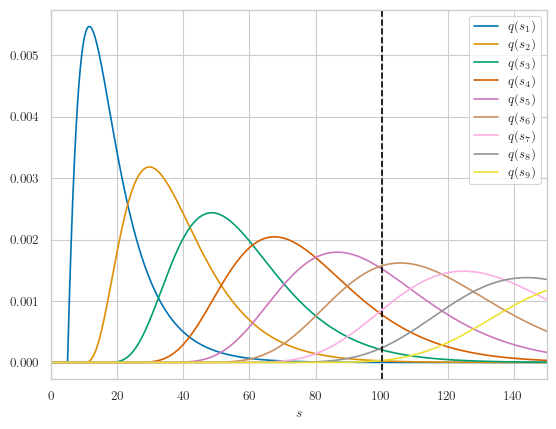

In [20]:
def norm(arr):
    return arr / np.sum(arr)

# convolution in the time domain = multiplication in the frequency domain
t = np.arange(0, 10*spike_train.duration, 0.1)
qt = norm(spike_train.q(t))

qf = np.fft.rfft(qt)
tmp = np.copy(qf)

fig, ax = plt.subplots(1, 1)

for i in range(9):
    ax.plot(t, norm(np.around(np.fft.irfft(tmp), 9)), label=f"$q(s_{i+1})$")
    tmp = tmp * qf
ax.legend()
ax.set_xlabel(f"$s$")
ax.set_xlim(0, 1.5*spike_train.duration)
ax.axvline(spike_train.duration, linestyle="--", color="black")
plt.show()

In [21]:
spike_train.random()

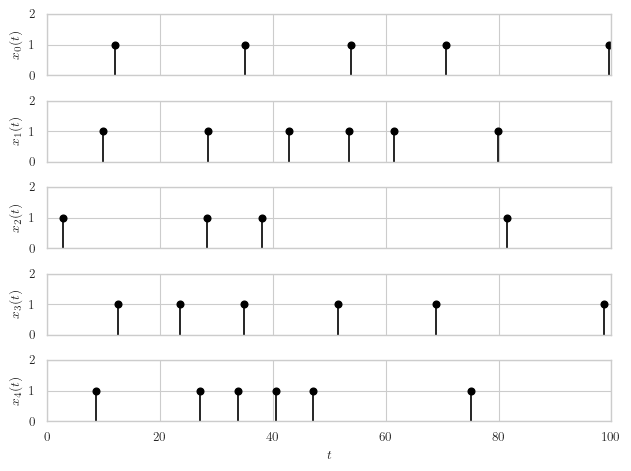

In [23]:
fig, axes = plt.subplots(num_channels, 1, sharex="all")

for c in range(num_channels):
    axes[c].stem(spike_train.firing_times[c], np.ones_like(spike_train.firing_times[c]), basefmt=" ", linefmt='black')
    axes[c].set_ylabel(f"$x_{c}(t)$")
    axes[c].set_ylim(0, 2)

axes[-1].set_xlabel("$t$")
axes[-1].set_xlim(0, spike_train.duration)
    
fig.tight_layout()

In [24]:
num_channels = 2000
spike_train = SpikeTrain(num_channels, duration, firing_rate, hard_refractory_period, soft_refractory_period)
periodic_spike_train = PeriodicSpikeTrain(num_channels, duration, firing_rate, hard_refractory_period, soft_refractory_period)

In [25]:
spike_train.random()

In [26]:
periodic_spike_train.random()

In [27]:
print(f"spike train: {np.mean([ft.shape[0] for ft in spike_train.firing_times])} (+/- {np.std([ft.shape[0] for ft in spike_train.firing_times])})) spikes")
print(f"periodic spike train: {np.mean([ft.shape[0] for ft in periodic_spike_train.firing_times])} (+/- {np.std([ft.shape[0] for ft in periodic_spike_train.firing_times])})) spikes")

spike train: 5.217 (+/- 1.3326331077982418)) spikes
periodic spike train: 5.5585 (+/- 1.2343329170041606)) spikes


In [29]:
from rsnn.rsnn.rsnn import Network

num_neurons = 500

firing_threshold = 1.0
somatic_decay = 5 # somatic time constant c_0, e.g., 1/10 ms
soft_refractory_weight = 10.0

num_synapses = 500
synaptic_decay = 3 # synaptic time constant c_k, e.g., 1/5 ms
weights_lim = (-0.25, 0.25)
delays_lim = (1.0, 10.0)

slope = 1
level = 5e-1 # below the firing threshold
time_step = 0.2 # time step
eps = 1


/Users/haguettaz/Documents/RSNN/src/rsnn/rsnn/rsnn.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [30]:

spike_trains = []
for _ in range(3):
    spike_train = PeriodicSpikeTrain(num_neurons, period, firing_rate, hard_refractory_period, soft_refractory_period)
    spike_train.random()
    spike_trains.append(spike_train)


In [31]:
from rsnn.utils.utils import save

In [32]:
save(spike_trains, "test.pkl")

In [25]:
network = Network(num_neurons, num_synapses, firing_threshold, synaptic_decay, somatic_decay, delays_lim, hard_refractory_period, soft_refractory_period, soft_refractory_weight, weights_lim)    

In [23]:
network.memorize(spike_trains, slope, level, eps, time_step)

  0%|          | 0/500 [00:00<?, ?it/s]

24
18
21
17
20
15
11


KeyboardInterrupt: 

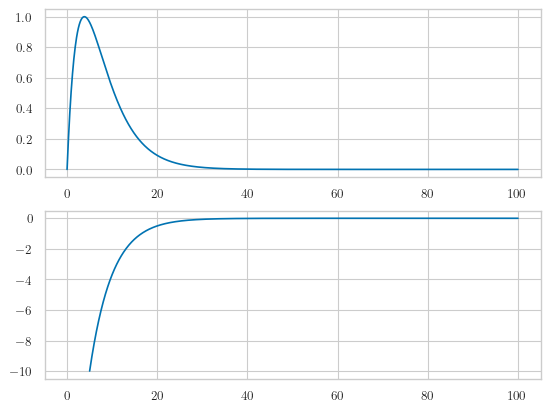

In [28]:
fig, axes = plt.subplots(2, 1)

t = np.linspace(0, period, 1000)
axes[0].plot(t, network.neurons[0].impulse_resp(t[:,None]))
axes[1].plot(t, network.neurons[0].refractory_resp(t[:,None]))
plt.show()